In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test_df=pd.read_csv("test_x.csv")
data=train.copy()

In [3]:
data.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [4]:
data["Öbek İsmi"].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64

In [5]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

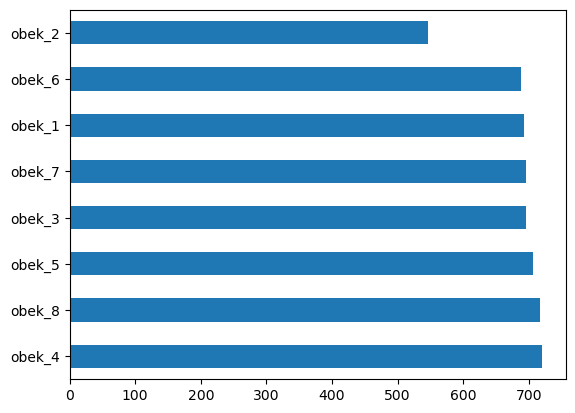

In [6]:
data["Öbek İsmi"].value_counts().plot.barh();

In [7]:
data.describe().round(3)

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
count,5460.000,5460.000,5460.000,5460.000,5460.000
mean,2729.500,363571.133,16616.612,24.041,73.446
std,1576.311,219714.442,14099.172,14.946,47.214
min,0.000,43922.989,2859.254,0.000,3.978
25%,1364.750,215693.439,4931.859,11.551,25.009
50%,2729.500,286925.436,8426.819,20.096,82.486
75%,4094.250,468188.222,30579.245,35.918,104.473
max,5459.000,1192437.145,48605.594,64.616,242.308


In [8]:
data.corr()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
index,1.000000,0.036008,0.019259,0.012507,-0.001693
Yıllık Ortalama Gelir,0.036008,1.000000,0.740238,0.444398,0.145425
Yıllık Ortalama Satın Alım Miktarı,0.019259,0.740238,1.000000,0.418499,0.133864
Yıllık Ortalama Sipariş Verilen Ürün Adedi,0.012507,0.444398,0.418499,1.000000,0.659455
Yıllık Ortalama Sepete Atılan Ürün Adedi,-0.001693,0.145425,0.133864,0.659455,1.000000


In [9]:
data.drop("index",axis=1,inplace=True)

In [10]:
data.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [11]:
df_2 = data[data["Öbek İsmi"] == "obek_2"]      


In [12]:
from sklearn.utils import resample
desired_sample_count = 150

df_2_upsampled = resample(df_2, replace=True, n_samples=desired_sample_count, random_state=12)



In [13]:
df_2_upsampled.shape

(150, 13)

In [14]:
balanced_data = pd.concat([data, df_2_upsampled])

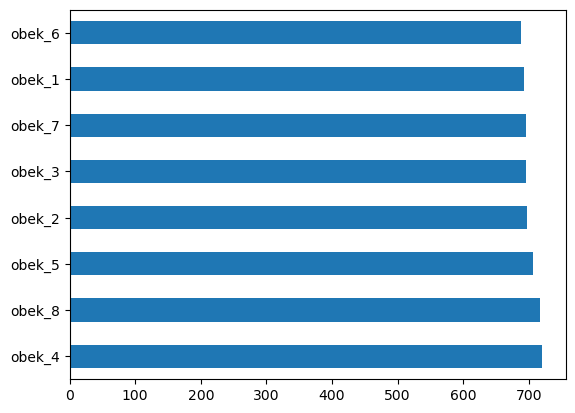

In [15]:
balanced_data["Öbek İsmi"].value_counts().plot.barh();

In [16]:
hopa=data.copy()

In [17]:
data=balanced_data

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 4006
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Cinsiyet                                    5610 non-null   object 
 1   Yaş Grubu                                   5610 non-null   object 
 2   Medeni Durum                                5610 non-null   object 
 3   Eğitim Düzeyi                               5610 non-null   object 
 4   İstihdam Durumu                             5610 non-null   object 
 5   Yıllık Ortalama Gelir                       5610 non-null   float64
 6   Yaşadığı Şehir                              5610 non-null   object 
 7   En Çok İlgilendiği Ürün Grubu               5610 non-null   object 
 8   Yıllık Ortalama Satın Alım Miktarı          5610 non-null   float64
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  5610 non-null   float64
 10  Eğitime Deva

In [19]:
#balanced_data["Öbek İsmi"].value_counts().plot.barh();

In [20]:
#dönüştürelecek DataFrame adı -->data

columns_l = list(data.columns)
categorical_columns = []

object_to_category = False  # Önce döngüde herhangi bir değişiklik yapılmadığını varsayalım

for i in columns_l:
    if data[i].dtype == 'object' or data[i].dtype.name == 'category':
        categorical_columns.append(i)
        if data[i].dtype == 'object':
            object_to_category = True  # En az bir "object" tipinde sütun bulundu

# "object" tipindeki sütunları "category" tipine dönüştürme ve çevrilenleri yazdırma
for column in categorical_columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Eğer dönüştürme yapıldıysa, çevrilenleri yazdırma
if object_to_category:
    print("Kategorik değişkene çevrilenler:")
    for column in categorical_columns:
        if data[column].dtype == 'category':
            print(column)
else:
    print("Object tipinde kolon yok.")

Kategorik değişkene çevrilenler:
Cinsiyet
Yaş Grubu
Medeni Durum
Eğitim Düzeyi
İstihdam Durumu
Yaşadığı Şehir
En Çok İlgilendiği Ürün Grubu
Eğitime Devam Etme Durumu
Öbek İsmi


In [21]:
category_colons = []
x=data

for column in x.columns:
    if x[column].dtype == "category":
        category_colons.append(column)
    else:
        pass
category_colons

['Cinsiyet',
 'Yaş Grubu',
 'Medeni Durum',
 'Eğitim Düzeyi',
 'İstihdam Durumu',
 'Yaşadığı Şehir',
 'En Çok İlgilendiği Ürün Grubu',
 'Eğitime Devam Etme Durumu',
 'Öbek İsmi']

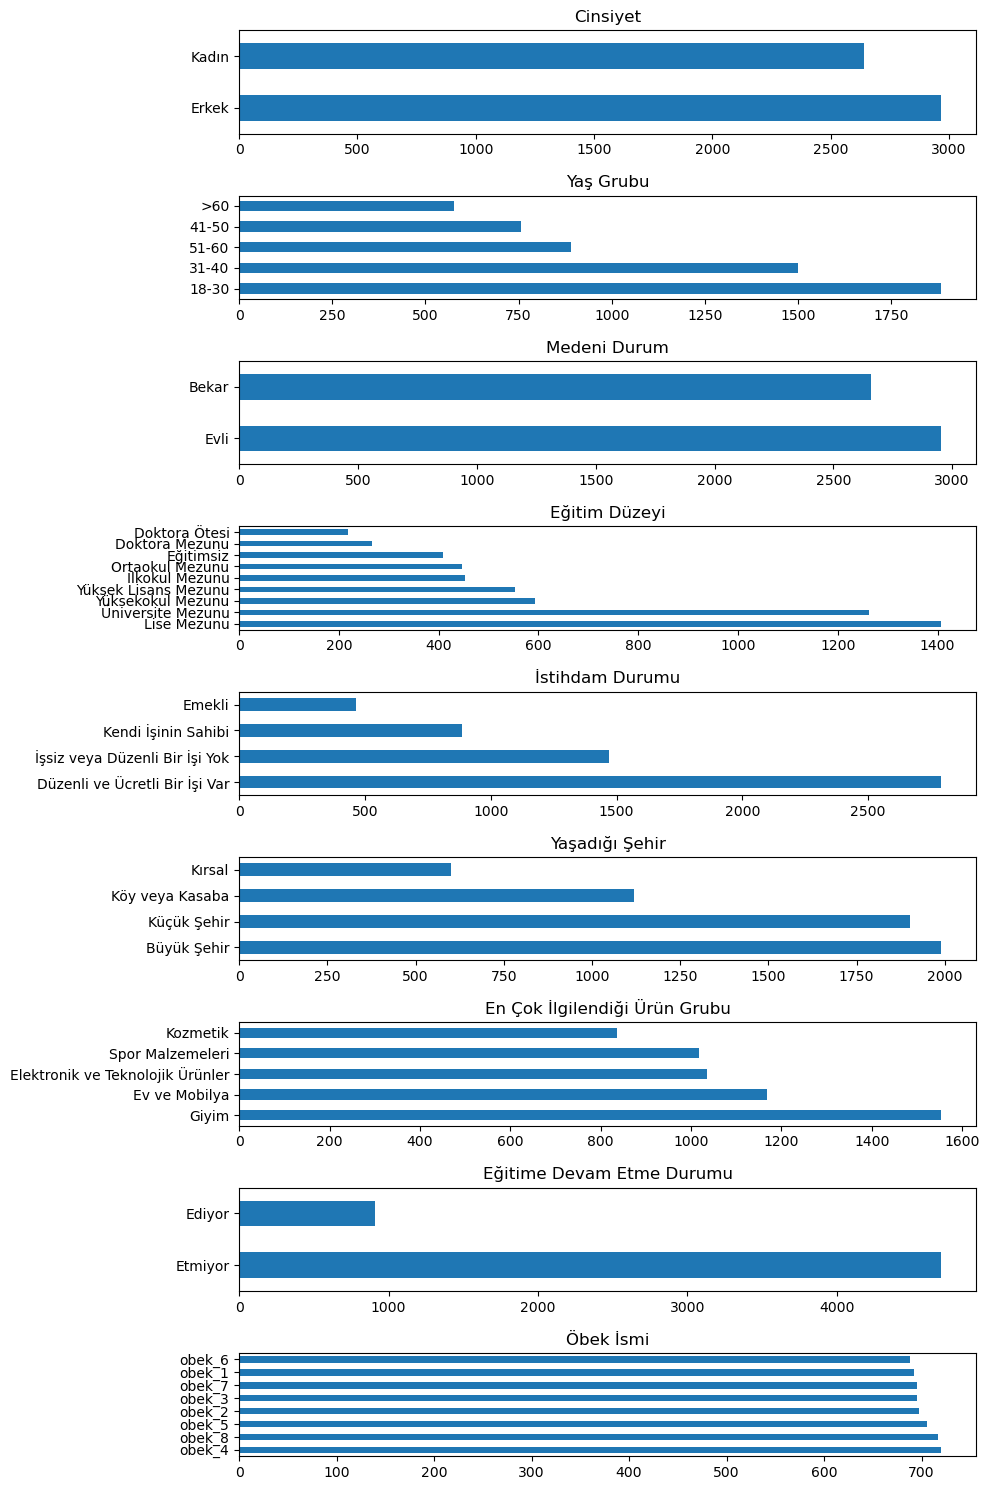

In [22]:

plt.figure(figsize=(10, 15))  # Grafiğin boyutunu ayarlayabilirsiniz
for i, col in enumerate(category_colons):
    plt.subplot(9, 1, i+1)  # Alt alta çizim için alt grafikler oluşturuluyor
    data[col].value_counts().plot.barh()
    plt.title(col)  # Her grafik için başlık ayarlanıyor
    plt.tight_layout()  # Grafiklerin üst üste binmesini engellemek için sıkıştırma
plt.show()

In [23]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [24]:
!pip install jupyterthemes
!jt -t chesterish

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'jt' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [26]:
#set_nb_theme('onedork')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
y=data["Öbek İsmi"]

In [29]:
x=data.drop("Öbek İsmi",axis=1)

In [30]:
x.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,20.470459


In [31]:
y

0       obek_4
1       obek_5
2       obek_8
3       obek_3
4       obek_3
         ...  
1994    obek_2
5237    obek_2
3323    obek_2
5094    obek_2
4006    obek_2
Name: Öbek İsmi, Length: 5610, dtype: category
Categories (8, object): ['obek_1', 'obek_2', 'obek_3', 'obek_4', 'obek_5', 'obek_6', 'obek_7', 'obek_8']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
import pandas as pd
#girdi--> data

df =X_train

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    
X_train=df

In [34]:
import pandas as pd
#girdi--> data

df =X_test

# Kategorik sütunlara dönüşüm ve (n-1) kuralı uygulama
categorical_columns = df.select_dtypes(include=["category"]).columns

for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)
    
X_test=df

In [35]:
dumy_colons = []
test_df=X_train

for column in test_df.columns:
    if test_df[column].dtype == "uint8":
        dumy_colons.append(column)
    else:
        pass
dumy_colons

['Cinsiyet_Kadın',
 'Yaş Grubu_31-40',
 'Yaş Grubu_41-50',
 'Yaş Grubu_51-60',
 'Yaş Grubu_>60',
 'Medeni Durum_Evli',
 'Eğitim Düzeyi_Doktora Ötesi',
 'Eğitim Düzeyi_Eğitimsiz',
 'Eğitim Düzeyi_Lise Mezunu',
 'Eğitim Düzeyi_Ortaokul Mezunu',
 'Eğitim Düzeyi_Yüksek Lisans Mezunu',
 'Eğitim Düzeyi_Yüksekokul Mezunu',
 'Eğitim Düzeyi_Üniversite Mezunu',
 'Eğitim Düzeyi_İlkokul Mezunu',
 'İstihdam Durumu_Emekli',
 'İstihdam Durumu_Kendi İşinin Sahibi',
 'İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok',
 'Yaşadığı Şehir_Köy veya Kasaba',
 'Yaşadığı Şehir_Küçük Şehir',
 'Yaşadığı Şehir_Kırsal',
 'En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya',
 'En Çok İlgilendiği Ürün Grubu_Giyim',
 'En Çok İlgilendiği Ürün Grubu_Kozmetik',
 'En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri',
 'Eğitime Devam Etme Durumu_Etmiyor']

In [36]:
from sklearn.preprocessing import StandardScaler

# Veriyi alın
# x_train: eğitim verisi
# x_test: test verisi
x_train=X_train
x_test=X_train




# Seçilen dummy değişken sütunları
selected_dummy_cols = dumy_colons

# Seçilen dummy değişkenleri çıkarın ve kalan sütunlar üzerinde işlem yapın
x_train_without_dummy = x_train.drop(selected_dummy_cols, axis=1)
x_test_without_dummy = x_test.drop(selected_dummy_cols, axis=1)

# StandardScaler nesnesini oluşturun
scaler = StandardScaler()

# Eğitim verisini kullanarak ölçeklendirme işlemini öğrenin ve uygulayın
x_train_scaled = scaler.fit_transform(x_train_without_dummy)

# Test verisini eğitim verisine göre aynı şekilde ölçeklendirin
x_test_scaled = scaler.transform(x_test_without_dummy)

# Dummy değişken sütunları ile ölçeklendirilmiş verileri birleştirin
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train_without_dummy.columns, index=x_train_without_dummy.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test_without_dummy.columns, index=x_test_without_dummy.index)

# Dummy değişken sütunları ekleyerek ölçeklendirilmiş verileri tamamlanmış veriye dönüştürün
x_train_final = pd.concat([x_train_scaled_df, x_train[selected_dummy_cols]], axis=1)
x_test_final = pd.concat([x_test_scaled_df, x_test[selected_dummy_cols]], axis=1)


In [37]:
x_test_final.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
657,-0.369393,-0.801027,-1.374166,-1.313144,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2968,-0.001904,0.671530,-0.126871,0.742270,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3471,-1.056517,-0.818474,-1.327132,-1.336244,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2833,-0.581183,-0.729734,-1.302968,-1.293549,1,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,1
4838,-0.536811,-0.661395,-0.622952,-1.036503,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1


In [38]:
x_train_final.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
657,-0.369393,-0.801027,-1.374166,-1.313144,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2968,-0.001904,0.671530,-0.126871,0.742270,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3471,-1.056517,-0.818474,-1.327132,-1.336244,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2833,-0.581183,-0.729734,-1.302968,-1.293549,1,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,1
4838,-0.536811,-0.661395,-0.622952,-1.036503,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1


In [39]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

X=x_train_final


# LOF modelini oluşturma
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Parametreleri ayarlayabilirsiniz

# Modeli veriye uygulama
outliers = clf.fit_predict(X)

# Aykırı değerleri indekslerini alma
outlier_indices = np.where(outliers == -1)[0]

# Aykırı değerlerin sayısı
num_outliers = len(outlier_indices)
print(f"Aykırı Değer Sayısı: {num_outliers}")

# Aykırı değerlerin indekslerini görüntüleme
print("Aykırı Değerlerin İndeksleri:")
print(outlier_indices)


Aykırı Değer Sayısı: 449
Aykırı Değerlerin İndeksleri:
[   7   31   55   61   66   76   79   87   92   97   99  107  110  120
  138  139  151  159  172  174  191  195  201  208  219  226  237  240
  244  261  283  289  291  298  318  324  326  332  350  351  356  405
  412  428  453  455  465  476  483  497  516  517  518  538  540  546
  552  566  583  590  602  613  616  618  619  625  643  648  650  666
  706  708  715  724  726  735  736  747  752  753  755  761  775  792
  800  801  866  870  883  885  893  897  911  922  927  929  944  978
  982  989  999 1000 1001 1007 1011 1014 1027 1040 1041 1067 1068 1078
 1088 1091 1105 1108 1128 1130 1131 1137 1161 1168 1169 1170 1181 1205
 1207 1209 1214 1218 1239 1247 1254 1270 1271 1273 1283 1290 1297 1342
 1346 1348 1349 1359 1360 1362 1378 1388 1407 1419 1436 1452 1459 1474
 1489 1501 1547 1554 1559 1565 1578 1582 1592 1605 1612 1614 1623 1655
 1679 1681 1683 1684 1701 1706 1722 1724 1725 1727 1730 1734 1747 1749
 1756 1799 1815 1817 1

  File "C:\Users\Selman\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [40]:
#x_train_final


In [41]:
df_scores = clf.negative_outlier_factor_

In [42]:
np.sort(df_scores)[0:449]


array([-1.52926959, -1.50647686, -1.47071238, -1.46938326, -1.46657515,
       -1.43840312, -1.40604701, -1.39737108, -1.38905416, -1.38373227,
       -1.38206627, -1.38145657, -1.37827227, -1.37753682, -1.37481057,
       -1.37188054, -1.3718019 , -1.36459526, -1.36115751, -1.36087374,
       -1.35478043, -1.35184301, -1.35159409, -1.34457032, -1.34247515,
       -1.34229733, -1.34219257, -1.34083142, -1.33966215, -1.33909011,
       -1.33760753, -1.33651686, -1.33513183, -1.33349471, -1.33322515,
       -1.32738352, -1.32736383, -1.32734706, -1.32424461, -1.32199803,
       -1.31968087, -1.31363045, -1.31357686, -1.31307975, -1.30982659,
       -1.30564467, -1.30472407, -1.30267647, -1.29957821, -1.29822621,
       -1.298077  , -1.2974277 , -1.29711364, -1.29653305, -1.29525292,
       -1.29440998, -1.29440389, -1.29356864, -1.29323472, -1.29195767,
       -1.291172  , -1.29097589, -1.28947776, -1.28886137, -1.28659471,
       -1.28565375, -1.28492735, -1.28417783, -1.28321541, -1.28

In [43]:
esik_deger = np.sort(df_scores)[220]

In [44]:
aykiri_tf = df_scores > esik_deger

In [45]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [46]:
baski_deger = x_train_final[df_scores == esik_deger]

In [47]:
aykirilar = x_train_final[~aykiri_tf]

In [48]:
aykirilar

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
3684,-0.633342,-0.553416,1.994356,3.619033,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1034,-0.628549,-0.837233,-1.012931,0.681965,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
3625,0.608427,1.591446,0.113500,-0.275716,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
596,-0.617690,-0.854813,-0.930400,0.454678,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1550,0.034525,0.884373,-0.308966,0.723957,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,-0.662670,-0.895928,-0.926261,0.413626,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
804,-0.635267,-0.854148,-0.888580,0.683053,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
2278,-0.542395,-0.854000,-0.991852,0.365867,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1267,0.654302,1.428870,0.353783,-0.388935,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1


In [49]:
aykirilar.to_records(index = False)

rec.array([(-6.33341675e-01, -0.55341583,  1.99435614,  3.61903325, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0),
           (-6.28549486e-01, -0.83723316, -1.01293108,  0.68196496, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1),
           ( 6.08427105e-01,  1.59144558,  0.11350005, -0.27571629, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1),
           (-6.17690125e-01, -0.85481317, -0.93040013,  0.45467765, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
           ( 3.45253152e-02,  0.88437314, -0.30896632,  0.72395697, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0),
           ( 1.91834674e+00,  0.95022721,  1.02748514,  0.33957009, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0),
           (-6.17797583e-01, -0.85652321, -0.96990521,  0.54391937, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [50]:
res = aykirilar.to_records(index = False)

In [51]:
res[:] = baski_deger.to_records(index = False)

In [52]:
res

rec.array([(-0.64446804, -0.90217959, -0.92347383, 0.61344559, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1),
           (-0.64446804, -0.90217959, -0.92347383, 0.61344559, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1),
           (-0.64446804, -0.90217959, -0.92347383, 0.61344559, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1),
           (-0.64446804, -0.90217959, -0.92347383, 0.61344559, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1),
           (-0.64446804, -0.90217959, -0.92347383, 0.61344559, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1),
           (-0.64446804, -0.90217959, -0.92347383, 0.61344559, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1),
           (-0.64446804, -0.90217959, -0.92347383, 0.61344559, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1),
           (-0.64446804, -0

In [53]:
x_train_final[~aykiri_tf]

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
3684,-0.633342,-0.553416,1.994356,3.619033,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1034,-0.628549,-0.837233,-1.012931,0.681965,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
3625,0.608427,1.591446,0.113500,-0.275716,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
596,-0.617690,-0.854813,-0.930400,0.454678,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1550,0.034525,0.884373,-0.308966,0.723957,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,-0.662670,-0.895928,-0.926261,0.413626,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
804,-0.635267,-0.854148,-0.888580,0.683053,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,1
2278,-0.542395,-0.854000,-0.991852,0.365867,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1267,0.654302,1.428870,0.353783,-0.388935,1,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1


In [54]:
import pandas as pd
x_train_final[~aykiri_tf] = pd.DataFrame(res, index = x_train_final[~aykiri_tf].index)

In [55]:
x_train_final[~aykiri_tf]

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
3684,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1034,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3625,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
596,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1550,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
804,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
2278,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
1267,-0.644468,-0.90218,-0.923474,0.613446,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1


In [56]:
x_train_final.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
657,-0.369393,-0.801027,-1.374166,-1.313144,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2968,-0.001904,0.671530,-0.126871,0.742270,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3471,-1.056517,-0.818474,-1.327132,-1.336244,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2833,-0.581183,-0.729734,-1.302968,-1.293549,1,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,1
4838,-0.536811,-0.661395,-0.622952,-1.036503,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1


# model denemeleri

In [57]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [58]:
#lpjisitk regresyon

In [59]:
X=x_train_final
y=y_train

In [60]:
type(y_train)

pandas.core.series.Series

In [61]:
y_train.shape

(4488,)

In [62]:
y_train=pd.DataFrame(y_train)

In [63]:
x_train_final=pd.DataFrame(x_train_final)

In [64]:
x_train_final.shape

(4488, 29)

In [65]:
x_train_final.head()

,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet_Kadın,Yaş Grubu_31-40,Yaş Grubu_41-50,Yaş Grubu_51-60,Yaş Grubu_>60,Medeni Durum_Evli,...,İstihdam Durumu_Kendi İşinin Sahibi,İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok,Yaşadığı Şehir_Köy veya Kasaba,Yaşadığı Şehir_Küçük Şehir,Yaşadığı Şehir_Kırsal,En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya,En Çok İlgilendiği Ürün Grubu_Giyim,En Çok İlgilendiği Ürün Grubu_Kozmetik,En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri,Eğitime Devam Etme Durumu_Etmiyor
657,-0.369393,-0.801027,-1.374166,-1.313144,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2968,-0.001904,0.671530,-0.126871,0.742270,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3471,-1.056517,-0.818474,-1.327132,-1.336244,0,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,1
2833,-0.581183,-0.729734,-1.302968,-1.293549,1,0,1,0,0,0,...,0,1,1,0,0,0,0,1,0,1
4838,-0.536811,-0.661395,-0.622952,-1.036503,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1


In [66]:
X=x_train_final
y=y_train

from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [67]:
y_pred = loj_model.predict(X)

In [68]:
accuracy_score(y, y_pred)

0.9324866310160428

In [69]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

      obek_1       0.94      0.92      0.93       543
      obek_2       0.95      0.94      0.95       542
      obek_3       0.92      0.94      0.93       566
      obek_4       0.95      0.92      0.94       572
      obek_5       0.86      0.96      0.91       575
      obek_6       0.95      0.92      0.93       550
      obek_7       0.95      0.91      0.93       563
      obek_8       0.96      0.93      0.95       577

    accuracy                           0.93      4488
   macro avg       0.93      0.93      0.93      4488
weighted avg       0.93      0.93      0.93      4488



In [70]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [71]:
accuracy_score(y, y_pred)

0.9324866310160428

In [72]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.03064761, 0.00038432, 0.01743127, 0.10252002, 0.02080786])

In [73]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [74]:
accuracy_score(y_test, loj_model.predict(X_test))

0.6221033868092691

In [75]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.6461204171934259

In [76]:
##Gaussian Naive Bayes¶

In [77]:
X_train=x_train_final



nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [78]:
nb_model.predict(X_test)

array(['obek_4', 'obek_4', 'obek_4', ..., 'obek_4', 'obek_4', 'obek_4'],
      dtype='<U6')

In [79]:
nb_model.predict_proba(X_test)[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.]])

In [80]:
y_pred = nb_model.predict(X_test)

In [81]:
accuracy_score(y_test, y_pred)

0.1319073083778966

In [82]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.9331305309734514

In [83]:
##knn

In [84]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [85]:
y_pred = knn_model.predict(X_test)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [86]:
##SVC

In [87]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [88]:
y_pred = svm_model.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred)

0.1319073083778966

In [91]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1}


In [92]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [93]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.1319073083778966

RBF SVC

In [94]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [95]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.13279857397504458

In [96]:
from sklearn.neural_network import MLPClassifier

In [97]:
"""""""mlpc = MLPClassifier().fit(X_train_scaled, y_train)

SyntaxError: EOL while scanning string literal (3029103877.py, line 1)

In [98]:
"""""""y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

SyntaxError: EOL while scanning string literal (3312514987.py, line 1)

In [99]:
""""mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


SyntaxError: EOF while scanning triple-quoted string literal (3311839263.py, line 8)

In [100]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

NameError: name 'mlpc_cv_model' is not defined

In [101]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [102]:
mlpc_tuned.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [103]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

NameError: name 'X_test_scaled' is not defined

In [106]:
x_train_final.to_csv('x_train_final.csv', index=False)

In [107]:
x_test.to_csv('x_test_final.csv', index=False)

In [108]:
y_train.to_csv('y_train_final.csv', index=False)

In [109]:
y_test.to_csv('y_test_final.csv', index=False)